# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
df.rename({
    'GRADES_PK_G':'NUM_ENROLL_PREK',
    'GRADES_KG_G':'NUM_ENROLL_KINDER',
    'GRADES_4_G':'NUM_ENROLL_4',
    'GRADES_8_G':'NUM_ENROLL_8',
    'GRADES_12_G':'NUM_ENROLL_12',
    'GRADES_1_8_G':'NUM_ENROLL_PRIMARY',
    'GRADES_9_12_G':'NUM_ENROLL_HS',
    'GRADES_ALL_G':'NUM_ENROLL_ALL',
    'ENROLL':'NUM_ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_8_SCORE


In [8]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)


How many years of data are logged in our dataset? 

In [13]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [24]:
Ohio = df[df["STATE"] == "OHIO"]
ohioMean = Ohio["AVG_MATH_8_SCORE"].mean()

Michigan = df[df["STATE"] == "MICHIGAN"]
michiganMean = Michigan["AVG_MATH_8_SCORE"].mean()

print(ohioMean,michiganMean)
print(ohioMean - michiganMean)

282.25 276.1666666666667
6.083333333333314


Ohio had a higher mean 8th grade math score than Michigan by about 6 points.

Find the average for your outcome score across all states in 2019

In [25]:
df["AVG_MATH_8_SCORE"].mean()

278.28073089700996

In [26]:
df

,PRIMARY_KEY,STATE,YEAR,NUM_ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,NUM_ENROLL_4,NUM_ENROLL_8,NUM_ENROLL_12,NUM_ENROLL_PRIMARY,NUM_ENROLL_HS,NUM_ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [30]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max()


STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [119]:
df["GROWTH_IN_MATH"] = df["AVG_MATH_8_SCORE"] - df["AVG_MATH_4_SCORE"]

df["NUM_ENROLL_ALL_EST"] = df["NUM_ENROLL_ALL_EST"].fillna(df["NUM_ENROLL_ALL"])
df["INSTRUCTIONAL_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["NUM_ENROLL_ALL_EST"]






Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I added a column to measure a change in math scores between 4th and 8th grade because I am interested in seeing whether or not your 4th grade score has a significant impact on your 8th grade score. I believe many 4th graders feel as though they struggle with math and may score poorly when they are young, but I would like to see how common it is for them to improve their math skills as they get older. I am also interested in whether or not the instructional expenditure per student has an impact on 8th grade math scores, as I would expect that those who receive more money would score better. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Avg. Math Score and Instruction Exp. per Student over Time')

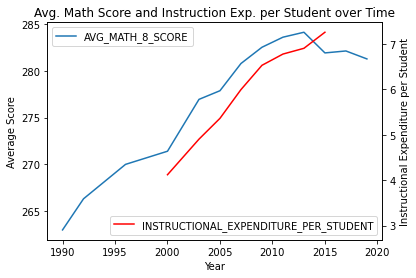

In [120]:
plot1 = df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plot2 = plot1.twinx()
plot2 = df.groupby('YEAR')["INSTRUCTIONAL_EXPENDITURE_PER_STUDENT"].mean().plot(color = 'red')
plot1.set_xlabel('Year')
plot1.set_ylabel('Average Score')
plot2.set_ylabel('Instructional Expenditure per Student')
plot1.legend()
plot2.legend()
plot1.set_title('Avg. Math Score and Instruction Exp. per Student over Time')




This plot is meant to show that (at least) between the years of 2000 and 2015, both the average math score of 8th graders and the average instructional expenditure increase in a somewhat linear fashion across all states.

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:xlabel='INSTRUCTIONAL_EXPENDITURE_PER_STUDENT', ylabel='GROWTH_IN_MATH'>

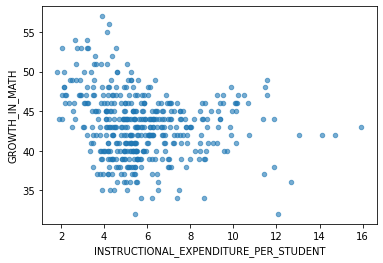

In [118]:
df.plot.scatter(x='INSTRUCTIONAL_EXPENDITURE_PER_STUDENT', y='GROWTH_IN_MATH', alpha=0.6)



This scatterplot is meant to illustrate the correlation between the amount of money spent on a student, and how much their math score improved between 4th and 8th grade. Based on this, I would argue that there is little correlation between the two, and if anything the r value may be slightly negative. 

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [136]:
from sklearn.model_selection import train_test_split


In [155]:
 X = df[['AVG_MATH_4_SCORE','INSTRUCTIONAL_EXPENDITURE_PER_STUDENT']].dropna()
 y = df.loc[X.index]['AVG_MATH_8_SCORE']
 y.fillna(y.median(), inplace=True)


In [156]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 19)



<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [157]:
from sklearn.linear_model import LinearRegression


In [158]:
# create your model here
model = LinearRegression()


In [159]:
model.fit(X_train, y_train)


LinearRegression()

In [161]:
y_pred = model.predict(X_test)


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [167]:
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)



[ 0.97016457 -0.28212994]
0.8598474754547974
3.927645338253363


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

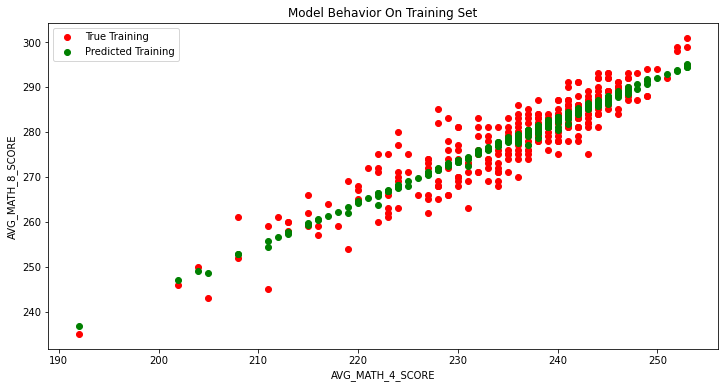

In [172]:
 col_name = 'AVG_MATH_4_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('AVG_MATH_8_SCORE')
 plt.title("Model Behavior On Training Set")


Text(0.5, 1.0, 'Model Behavior on Testing Set')

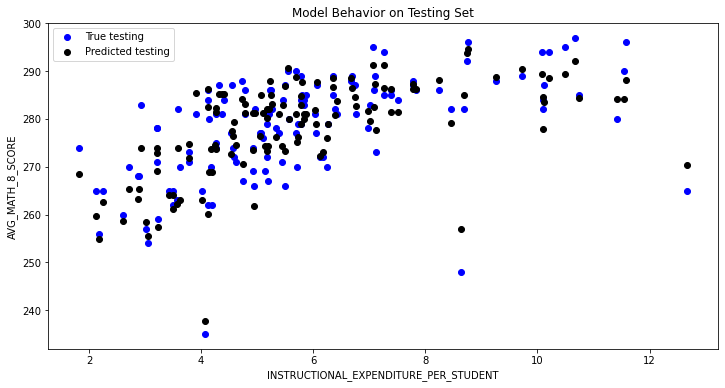

In [171]:
 col_name = 'INSTRUCTIONAL_EXPENDITURE_PER_STUDENT'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('AVG_MATH_8_SCORE')
 plt.title("Model Behavior on Testing Set")


I was hoping to see that 4th grade math scores were not as strongly correlated with 8th grade math scores, as this would mean that kids should not feel disappointed after potentially struglling in 4th grade math. However, this was not really the case, and the model showed that 4th grade math scores are an excellent predictor for 8th grade math scores. I was also expecting there to be a strong positive correlation between instructional expenditure per student and average 8th grade math score, and this was for the most part true. For both predictors, the model was mostly accurate. 

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**